# Fourier Transform
This notebook contains a visual introduction to Fourier transform. Most of the content of this notebook is from the book "Python Programming And Numerical Methods: A Guide For Engineers And Scientists", available online at https://pythonnumericalmethods.berkeley.edu/.

Check my Github for similar introductions to different subjects https://github.com/YZouzou.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
plt.style.use('ggplot')
plt.style.use('ggplot')
%matplotlib inline

### Wave Properties

In [6]:
@interact(amp = widgets.IntSlider(min=1, max=5, step=1, value=3, description = 'Amplitude'),
          freq = widgets.IntSlider(min = 1, max = 10, value = 1, description = 'Frequency'),
          sr = widgets.IntSlider(min = 10, max = 100, step = 10, value = 50, description = 'Sampling'))
def wave_prop(amp, freq, sr):
    x = np.linspace(0, 2, sr*2)
    y = amp * np.sin(2 * np.pi * freq * x)

    plt.figure(figsize = (10, 8), dpi = 75)
    plt.plot(x, y)
    plt.plot(x, y, 'kx', label = 'Samples')
    plt.ylim(-5.5, 5.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=3, description='Amplitude', max=5, min=1), IntSlider(value=1, descriptio…

### Creating a signal of multiple sine waves

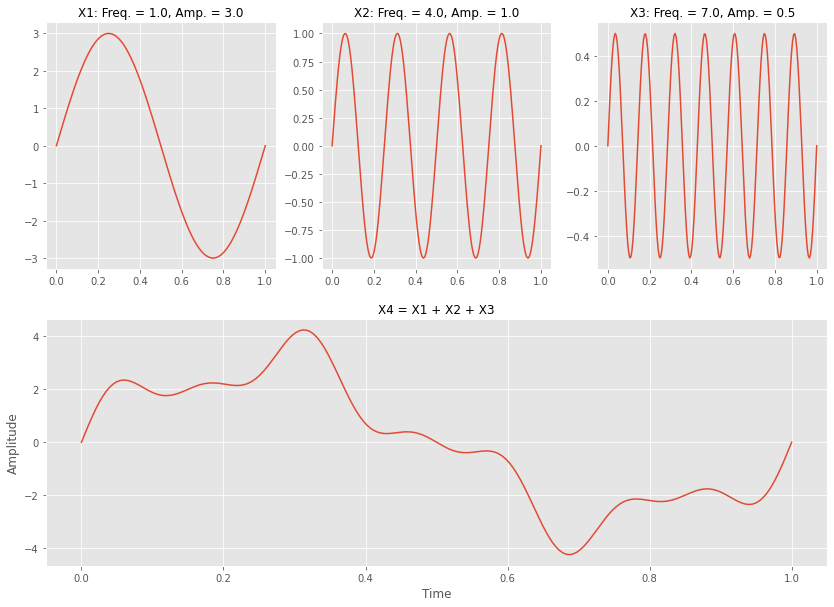

In [17]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

# Sampling rate (sr): Number of samples per 1 sec
sr = 200
t = np.linspace(0, 1, sr)

# x1
freq = 1.
amp = 3.
x1 = amp*np.sin(2*np.pi*freq*t)
ax1.plot(t, x1)
ax1.set_title('X1: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x2
freq = 4.
amp = 1.
x2 = amp*np.sin(2*np.pi*freq*t)
ax2.plot(t, x2)
ax2.set_title('X2: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x3
freq = 7.
amp = .5
x3 = amp*np.sin(2*np.pi*freq*t)
ax3.plot(t, x3)
ax3.set_title('X3: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x1 + x2 + x3
x4 = x1 + x2 + x3
ax4.plot(t, x4)
ax4.set_title('X4 = X1 + X2 + X3', fontsize = 12)
ax4.set_xlabel("Time")
ax4.set_ylabel('Amplitude')

# Show samples
# ax1.plot(t, x1, 'kx')
# ax2.plot(t, x2, 'kx')
# ax3.plot(t, x3, 'kx')
# ax4.plot(t, x4, 'kx', label = 'Samples')
# ax4.legend()

plt.show()

### Discrete Fourier Transform (DFT)
For a given time domain signal, the DFT returns the signal in the frequency domain, whereby the frequencies of the sine waves that constitute the given signal can be distinguished:

\begin{equation}
X_{k} = \sum_{n=0}^{N-1}x_{n} . e^{-i2\pi kn/N} = \sum_{n=0}^{N-1}x_{n}[cos(2\pi kn/N) - i.sin(2\pi kn/N)]
\end{equation}

DFT function:

In [18]:
def DFT(x):
    N = len(x)
    n = np.arange(N).reshape(1, N)
    k = n.reshape(N, 1)
    return np.exp(-2j * np.pi * k @ n / N) @ x

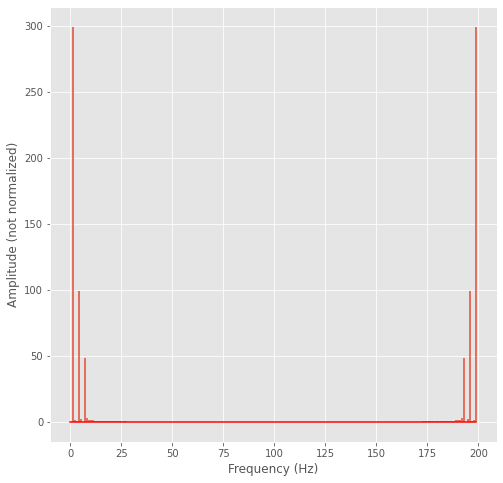

In [19]:
fig = plt.figure(figsize = (8, 8))
X = DFT(x4)
N = len(x4)
freq = np.arange(N)
plt.stem(freq, np.abs(X), use_line_collection = True, markerfmt = " ", basefmt = "-r")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (not normalized)')
plt.show()

### Normalized DFT

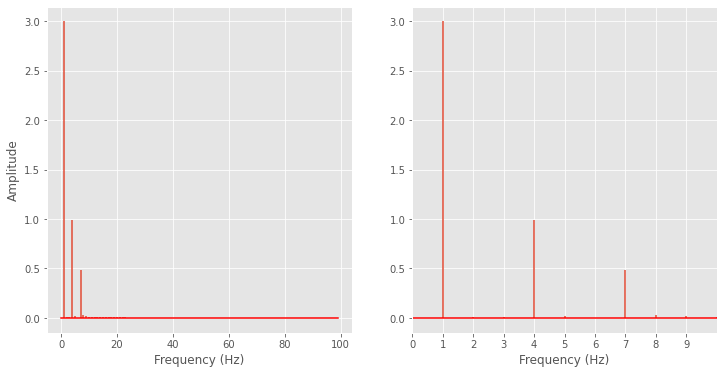

In [20]:
n_oneside = N//2

# One side Frequencies
freq_oneside = freq[:n_oneside]

# Normalized amplitudes
X_oneside = np.abs(X[:n_oneside])/n_oneside

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].stem(freq_oneside, X_oneside, use_line_collection = True, markerfmt = " ", basefmt = "-r")
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[1].stem(freq_oneside, X_oneside, use_line_collection = True, markerfmt = " ", basefmt = "-r")
axs[1].set_xlim(0, 10)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_xticks(range(10))
plt.show()

### The Inverse DFT
Using a frequency domain signal we can regenerate the time domain signal using the inverse Fourier transform:

\begin{equation}
x_{n} = \frac{1}{N} \sum_{k = 0}^{N-1}X_{k} . e^{i2\pi kn / N}
\end{equation}

In [21]:
def inv_dft(X):
    N = len(X)
    k = np.arange(N).reshape(1, -1)
    n = k.reshape(-1, 1)
    return (1/N) * np.exp(2j * np.pi * n@k / N) @ X

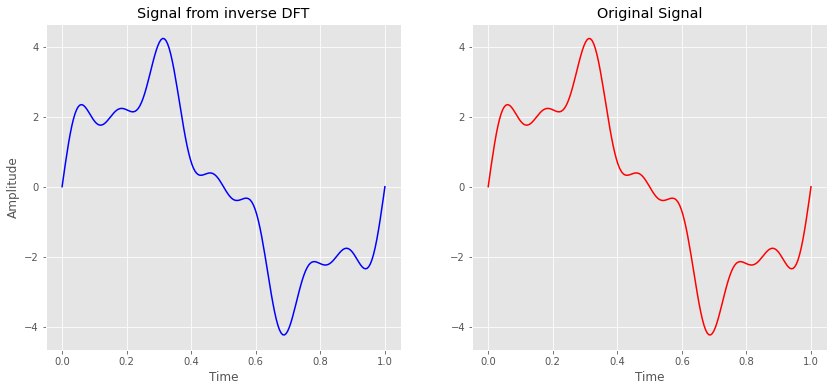

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
ax = axs[0]
ax.plot(t, inv_dft(X).real, 'b')
ax.set_xlabel("Time")
ax.set_ylabel('Amplitude')
ax.set_title('Signal from inverse DFT')

ax1 = axs[1]
ax1.plot(t, x4, 'r')
ax1.set_xlabel("Time")
ax1.set_title('Original Signal')
plt.show()

### Fast Fourier Transform
FFT returns the same results of a DFT, but using a more efficient algorithm.

In [23]:
from numpy.fft import fft, ifft

In [24]:
print('Fast Fourier Transform (Numpy):')
%timeit fft(x4)
print('\nDiscrete Fourier Transform:')
%timeit DFT(x4)

Fast Fourier Transform (Numpy):
3.3 µs ± 404 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Discrete Fourier Transform:
2.99 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Basic Filtering Using FFT
Here a high frequency sine wave is added to the previous signal to represent noise.

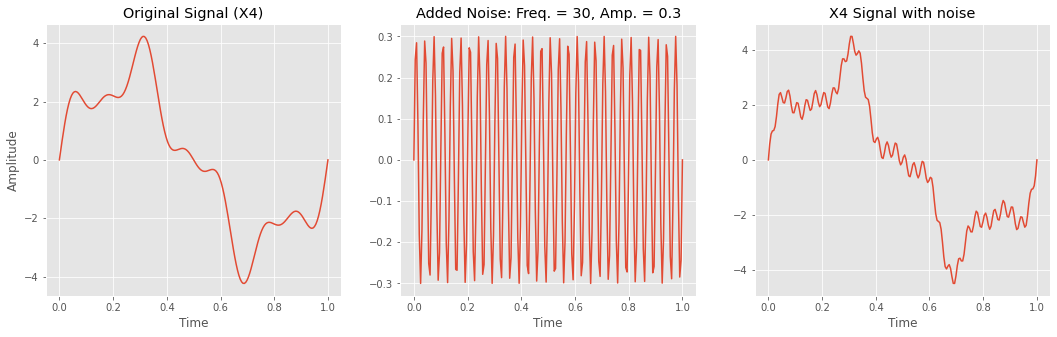

In [25]:
x5 = 0.3*np.sin(2*np.pi * 30 * t)
x6 = x4 + x5

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
ax0 = axs[0]
ax0.plot(t, x4)
ax0.set_ylabel('Amplitude')
ax0.set_xlabel('Time')
ax0.set_title('Original Signal (X4)')

ax1 = axs[1]
ax1.plot(t, x5)
ax1.set_xlabel('Time')
ax1.set_title('Added Noise: Freq. = 30, Amp. = 0.3')

ax2 = axs[2]
ax2.plot(t, x6)
ax2.set_xlabel('Time')
ax2.set_title('X4 Signal with noise')

plt.show()

By applying a Fast Fourier Transform on the signal, we obtain the following plot of the signal in the frequency domain. The added frequency can be seen at f = 30 Hz.

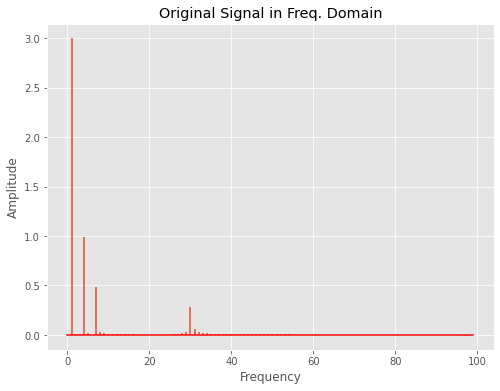

In [26]:
n_oneside = N//2
X1 = fft(x6)
X1_norm = X1[:n_oneside] / n_oneside
freq = np.arange(n_oneside)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X1_norm), use_line_collection = True, markerfmt = " ", basefmt = "-r")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Original Signal in Freq. Domain')
plt.show()

Assuming we are only interested in frequencies less than 10 Hz and greater frequencies represent noise, we set all higher values to zero and obtain the following graph of the filtered signal in the frequency domain.

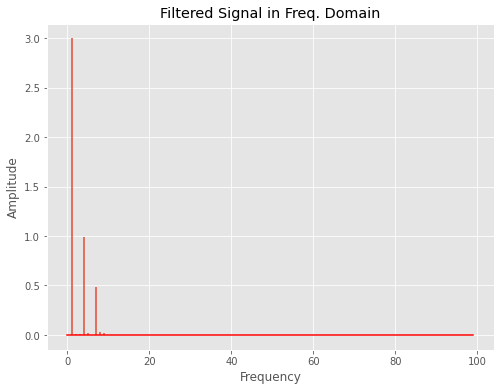

In [27]:
X1[10:] = 0
X1_norm = X1[:n_oneside] / n_oneside
freq = np.arange(n_oneside)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X1_norm), use_line_collection = True, markerfmt = " ", basefmt = "-r")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Freq. Domain')
plt.show()

Using the inverse FFT, we can retrieve the filtered signal in the time domain, this time excluding frequencies higher than 9 Hz.

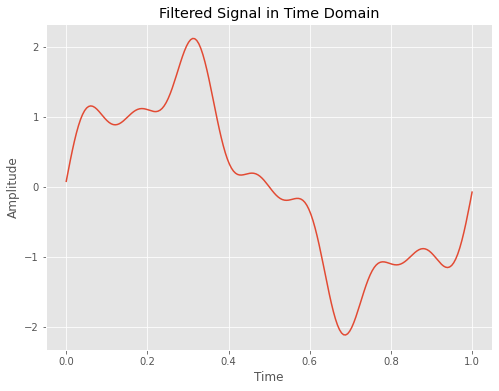

In [28]:
X_inv = ifft(X1)

plt.figure(figsize = (8, 6))
plt.plot(t, X_inv.real)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Time Domain')
plt.show()